<a href="https://colab.research.google.com/github/Reshma70/task4/blob/main/task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving archive (8).zip to archive (8) (3).zip
Extracted files: ['Twitter_Data.csv']

 Loaded CSV file: Twitter_Data.csv
Dataset preview:
                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0
Available columns: ['clean_text', 'category']

Detected text column: clean_text


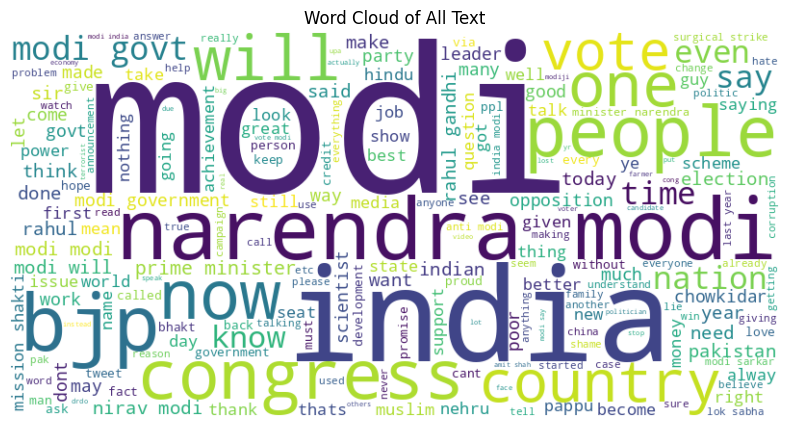


Classification Report:
              precision    recall  f1-score   support

        -1.0       0.93      0.41      0.57      7230
         0.0       0.87      0.70      0.77     10961
         1.0       0.66      0.95      0.78     14404

    accuracy                           0.75     32595
   macro avg       0.82      0.69      0.71     32595
weighted avg       0.79      0.75      0.73     32595



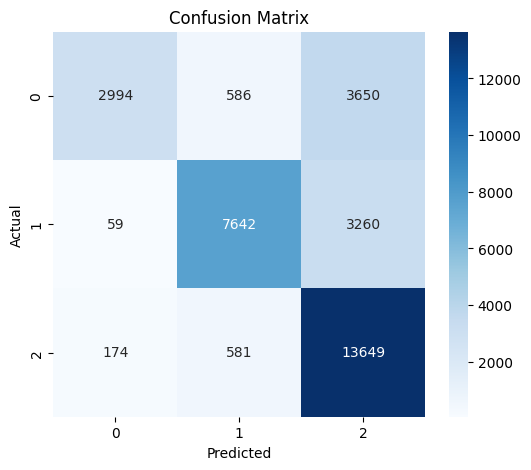

In [ ]:

from google.colab import files
import zipfile
import os
import pandas as pd

uploaded = files.upload()

for filename in uploaded.keys():
    if filename.endswith('.zip'):
        zip_path = f'/content/{filename}'
        extract_path = '/content/extracted'

        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_path)
            extracted_files = zip_ref.namelist()
            print("Extracted files:", extracted_files)


df = None
for file in extracted_files:
    if file.endswith('.csv'):
        csv_path = os.path.join(extract_path, file)
        df = pd.read_csv(csv_path)
        print(f"\n Loaded CSV file: {file}")
        break

if df is None:
    raise ValueError(" No CSV file found in the extracted ZIP.")

print("Dataset preview:")
print(df.head())
print("Available columns:", df.columns.tolist())


import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from wordcloud import WordCloud
import seaborn as sns
import re
import string


possible_text_cols = ['text', 'review', 'message', 'comment', 'content']
possible_label_cols = ['sentiment', 'label', 'category', 'target']

text_col = next((col for col in df.columns if col.lower() in possible_text_cols), df.columns[0])
label_col = next((col for col in df.columns if col.lower() in possible_label_cols), None)

print(f"\nDetected text column: {text_col}")
if not label_col:
    raise ValueError(" No label column found for sentiment classification.")


def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'\@\w+|\#','', text)
    text = re.sub(f'[{string.punctuation}]', '', text)
    text = re.sub(r'\d+', '', text)
    return text

df[text_col] = df[text_col].astype(str)
df['clean_text'] = df[text_col].apply(clean_text)
df = df[df[label_col].notnull()]

text_all = " ".join(df['clean_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_all)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of All Text")
plt.show()


vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['clean_text'])
y = df[label_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Saving archive (10).zip to archive (10) (5).zip
Extracted files: ['googleplaystore.csv', 'googleplaystore_user_reviews.csv', 'license.txt']

Loaded CSV file: googleplaystore_user_reviews.csv
Dataset preview:
                     App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'reviews' DataFrame loaded successfully from /content/extracted/googleplaystore_user_reviews.csv
Text preprocessing completed.


/tmp/ipython-input-43-997566178.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='viridis')


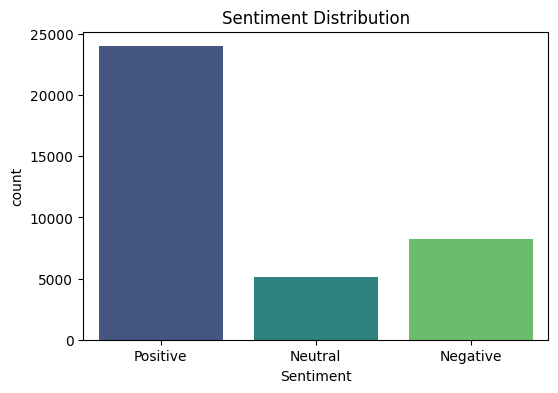

Sentiment distribution plotted.
TF-IDF feature extraction completed.
Logistic Regression model trained.

Classification Report:
               precision    recall  f1-score   support

    Negative       0.91      0.80      0.85      1653
     Neutral       0.87      0.83      0.85      1049
    Positive       0.92      0.96      0.94      4784

    accuracy                           0.91      7486
   macro avg       0.90      0.86      0.88      7486
weighted avg       0.91      0.91      0.91      7486

Accuracy: 0.9091637723751002
F1 Score (macro): 0.8800808969160262


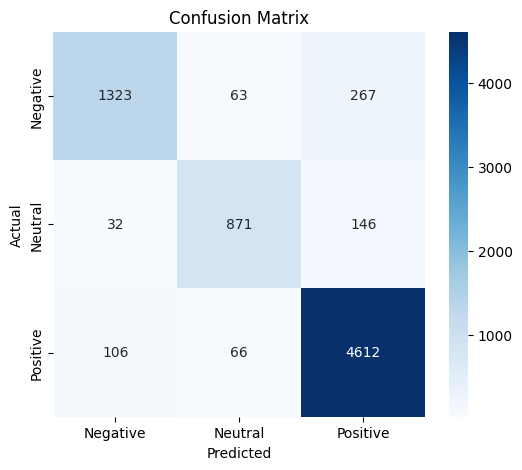

Model evaluation complete.


In [ ]:
from google.colab import files
import zipfile
import os
import pandas as pd

uploaded = files.upload()

for filename in uploaded.keys():
    if filename.endswith('.zip'):
        zip_path = f'/content/{filename}'
        extract_path = '/content/extracted'

        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_path)
            extracted_files = zip_ref.namelist()
            print("Extracted files:", extracted_files)


df = None
for file in extracted_files:
    if file == 'googleplaystore_user_reviews.csv':
        csv_path = os.path.join(extract_path, file)
        df = pd.read_csv(csv_path)
        print(f"\nLoaded CSV file: {file}")
        break


if df is None:
    raise ValueError(" No CSV file found in the extracted ZIP.")

print("Dataset preview:")
print(df.head())
print("Available columns:", df.columns.tolist())
df = df.dropna(subset=['Sentiment', 'Translated_Review'])


import pandas as pd
import numpy as np
import nltk
import re
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

csv_path = '/content/extracted/googleplaystore_user_reviews.csv'

try:
    reviews = pd.read_csv(csv_path)
    print(f"'reviews' DataFrame loaded successfully from {csv_path}")
except FileNotFoundError:
    print(f"Error: File not found at {csv_path}. Please check the path or extraction step.")
    raise

df = df.dropna(subset=['Sentiment', 'Translated_Review'])


stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['clean_review'] = df['Translated_Review'].apply(preprocess_text)
print("Text preprocessing completed.")

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Sentiment', palette='viridis')
plt.title("Sentiment Distribution")
plt.show()
print("Sentiment distribution plotted.")

X = df['clean_review']
y = df['Sentiment']

vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X)
print("TF-IDF feature extraction completed.")

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
print("Logistic Regression model trained.")

y_pred = model.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))


conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("Model evaluation complete.")
